In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
feature_name = iris.feature_names[0:2]
X = iris.data[:, 0:2]
y = iris.target

print(feature_name)

['sepal length (cm)', 'sepal width (cm)']


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape

(105, 2)

In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

clf1 = KNeighborsClassifier(n_neighbors=2)
clf2 = RandomForestClassifier(random_state=0)
clf3 = GaussianNB()

lr = LogisticRegression()
estimators = [('K-NN', clf1), ('rf', clf2), ('nb', clf3)]
sclf = StackingClassifier(estimators=estimators, 
                          final_estimator=lr, n_jobs=-1)
titles = ('K-NN', 'Random Forest', 'Naive Bayes',
          'Stacking')

models = (clf1, clf2, clf3, sclf)
models = [clf.fit(X_train, y_train) for clf in models]

scores = {}
for clf, title in zip(models, titles):
    scores[(title, 'Train score')] = clf.score(X_train, y_train)
    scores[(title, 'Test score')] = clf.score(X_test, y_test)

pd.Series(scores).unstack().sort_index(ascending=True)

,Test score,Train score
K-NN,0.711111,0.904762
Naive Bayes,0.800000,0.809524
Random Forest,0.666667,0.942857
Stacking,0.822222,0.838095


In [4]:
# 繪製學習曲線
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(estimator=sclf, X=X_train, y=y_train, 
                   train_sizes=np.linspace(0.1, 1.0, 10), 
                   cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
test_mean

array([0.44      , 0.43545455, 0.69545455, 0.75090909, 0.77090909,
       0.74181818, 0.77181818, 0.79090909, 0.79      , 0.79090909])

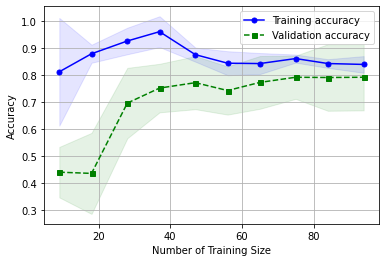

In [5]:
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_mean, color='blue', marker='o', 
         markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, 
                 train_mean + train_std, 
                 train_mean - train_std, 
                 alpha=.1, color='blue')
plt.plot(train_sizes, test_mean, color='green', ls='--',
         marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, 
                 test_mean + test_std, 
                 test_mean - test_std, 
                 alpha=.1, color='green')
plt.grid()
plt.xlabel('Number of Training Size')
plt.ylabel('Accuracy')
plt.legend();